# <font color='green'>BACCHANAL BUFFET </font><font color='BLUE'>Caesars Palace Las Vegas </font>

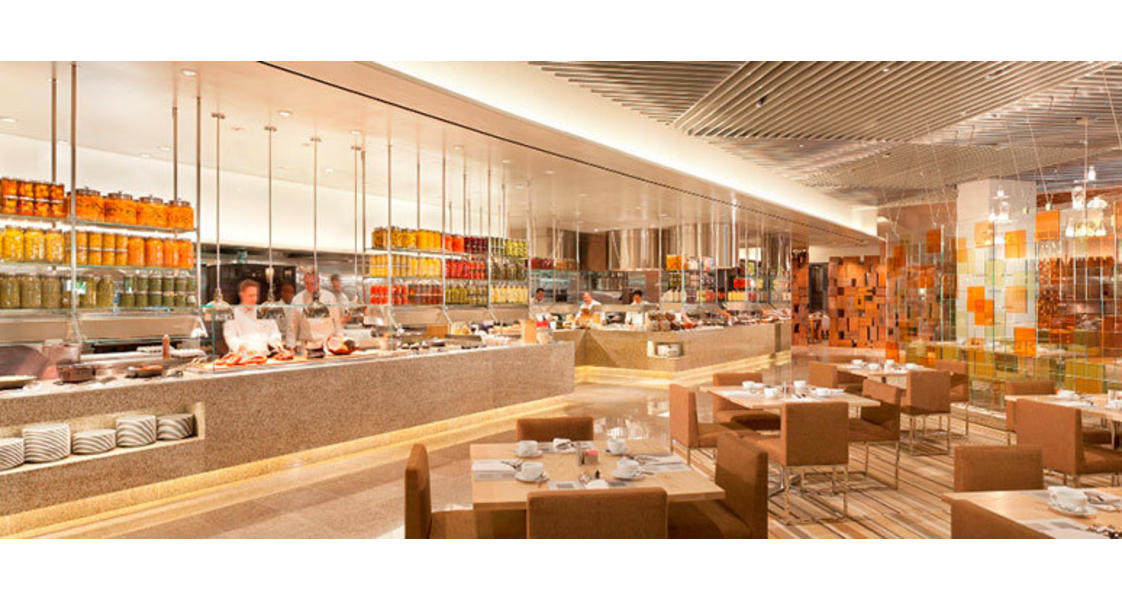

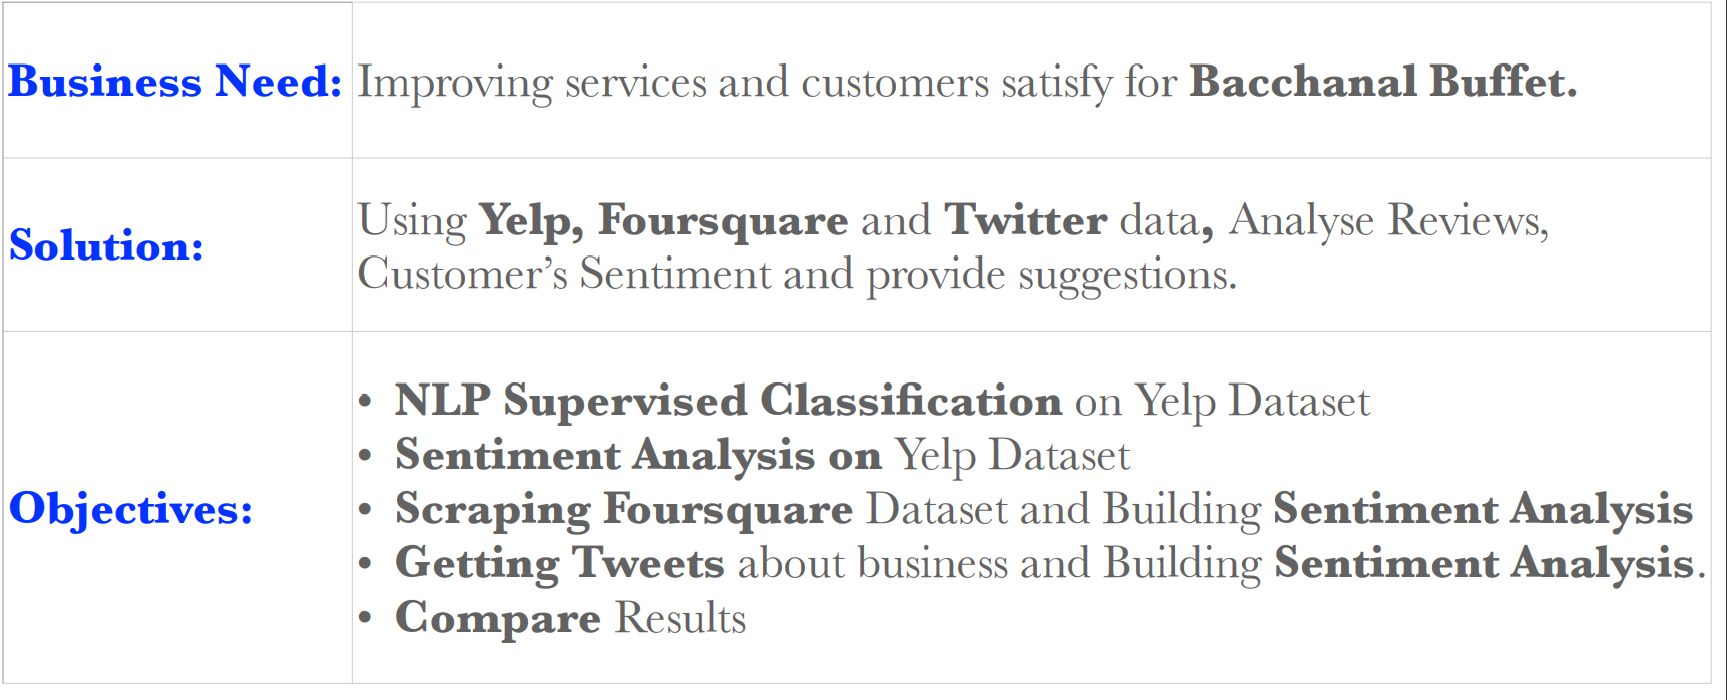

In [1]:
import pandas as pd 
import numpy as np 
import scipy as sp

import nltk
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB #binary ise bernolli ve digeeri
from sklearn.linear_model import LogisticRegressionCV
from sklearn import metrics
from textblob import TextBlob, Word
from nltk.stem.snowball import SnowballStemmer


import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
%ls

 Volume in drive C has no label.
 Volume Serial Number is 5074-7CFC

 Directory of C:\Users\Ahmet\Desktop\AI General\Projects\P2-NLP CLASSIFICATION & SENTIMENT ANALYSIS

06.08.2022  15:32    <DIR>          .
06.08.2022  15:32    <DIR>          ..
06.08.2022  11:50    <DIR>          .ipynb_checkpoints
06.08.2022  11:48            70.600 cloud.png
06.08.2022  14:20           177.766 Ekran Aaaaaaaaal�nt�s�.PNG
06.08.2022  15:32         1.208.851 NLP CLASSIFICATION & SENTIMENT ANALYSIS.ipynb
06.08.2022  11:48        35.271.913 NLP_Sentiment-Analysis.pdf
06.08.2022  11:48           126.152 original_Bacchanal-Buffet-at-Caesars-Palace.jpg
06.08.2022  11:48         8.955.572 restaurant.csv
06.08.2022  15:27           133.016 wc.png
               7 File(s)     45.943.870 bytes
               3 Dir(s)  85.560.029.184 bytes free


In [3]:
#You can get the data from the yelp website. This site gives you all the reviews for the restaurant or company

In [4]:
df=pd.read_csv('restaurant.csv')
df

,Unnamed: 0,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,2370338,_WTGv5XnA-qb_XD1D7Z0jg,6PgdGb3HrZdsfl2GiULo8w,RESDUcs7fIiihp38-d6_6g,5,0,1,0,After getting food poisoning at the Palms hote...,2012-12-04 03:10:18
1,2370357,JlNnsvMPLK_1-X2hwzK24w,IS9yw8P2uAPBX6FNLLX4KA,RESDUcs7fIiihp38-d6_6g,4,39,21,29,"""A feast worthy of Gods""\n\nBaccarnal Buffet i...",2014-01-17 00:50:50
2,2370373,hBkoWffORRb6aqKhC_Li2A,uZdFsE_aHbFBChgN6Xa8tw,RESDUcs7fIiihp38-d6_6g,4,1,1,1,The crab legs are better than the ones at Wick...,2015-06-08 18:03:09
3,2370411,rbkxvrgZg5kdCL2a66QYmA,8ZWJNAEWsymXDzKx3B0tTQ,RESDUcs7fIiihp38-d6_6g,1,0,0,0,Not worth it! Too salty food and expensive! Th...,2016-12-19 16:15:29
4,2370500,5tw_pedoHVi9bgeiBNsISg,E0sm4Ve7ifanFYeQMcV8Eg,RESDUcs7fIiihp38-d6_6g,5,0,0,0,I would give this infinite stars if I could. M...,2015-07-28 07:13:17
...,...,...,...,...,...,...,...,...,...,...
10412,3220114,46xWDTFPZI9u6waHm78EKw,CT57mpNepL9q9sTYFqRbLQ,RESDUcs7fIiihp38-d6_6g,5,0,0,0,"Best buffet ever! Irma was great, served us be...",2019-11-17 20:39:36
10413,3220152,gbBau-2wy3_kNr2y6dEa1Q,c-j3TV1F8rI6bQUD6nqGPQ,RESDUcs7fIiihp38-d6_6g,4,3,0,3,Hollllllyyyy moleyyyy! \n\nThis buffet was one...,2019-11-12 02:23:07
10414,3220255,2wFmrsm8j1cyyG-DoMqKUw,kbylx63ynkXL8YBJzVfNnQ,RESDUcs7fIiihp38-d6_6g,5,0,0,0,The selection is amazing and all the food is e...,2019-12-12 03:27:22
10415,3220306,75nzyA96_BgVrpflweAA3w,6rEG-G4syq5IvWti4tyPXA,RESDUcs7fIiihp38-d6_6g,4,1,1,2,One of the best buffets I've had in Vegas. My ...,2019-11-01 21:00:51


In [5]:
df.stars.value_counts()

5    4247
4    2636
3    1561
1    1056
2     917
Name: stars, dtype: int64

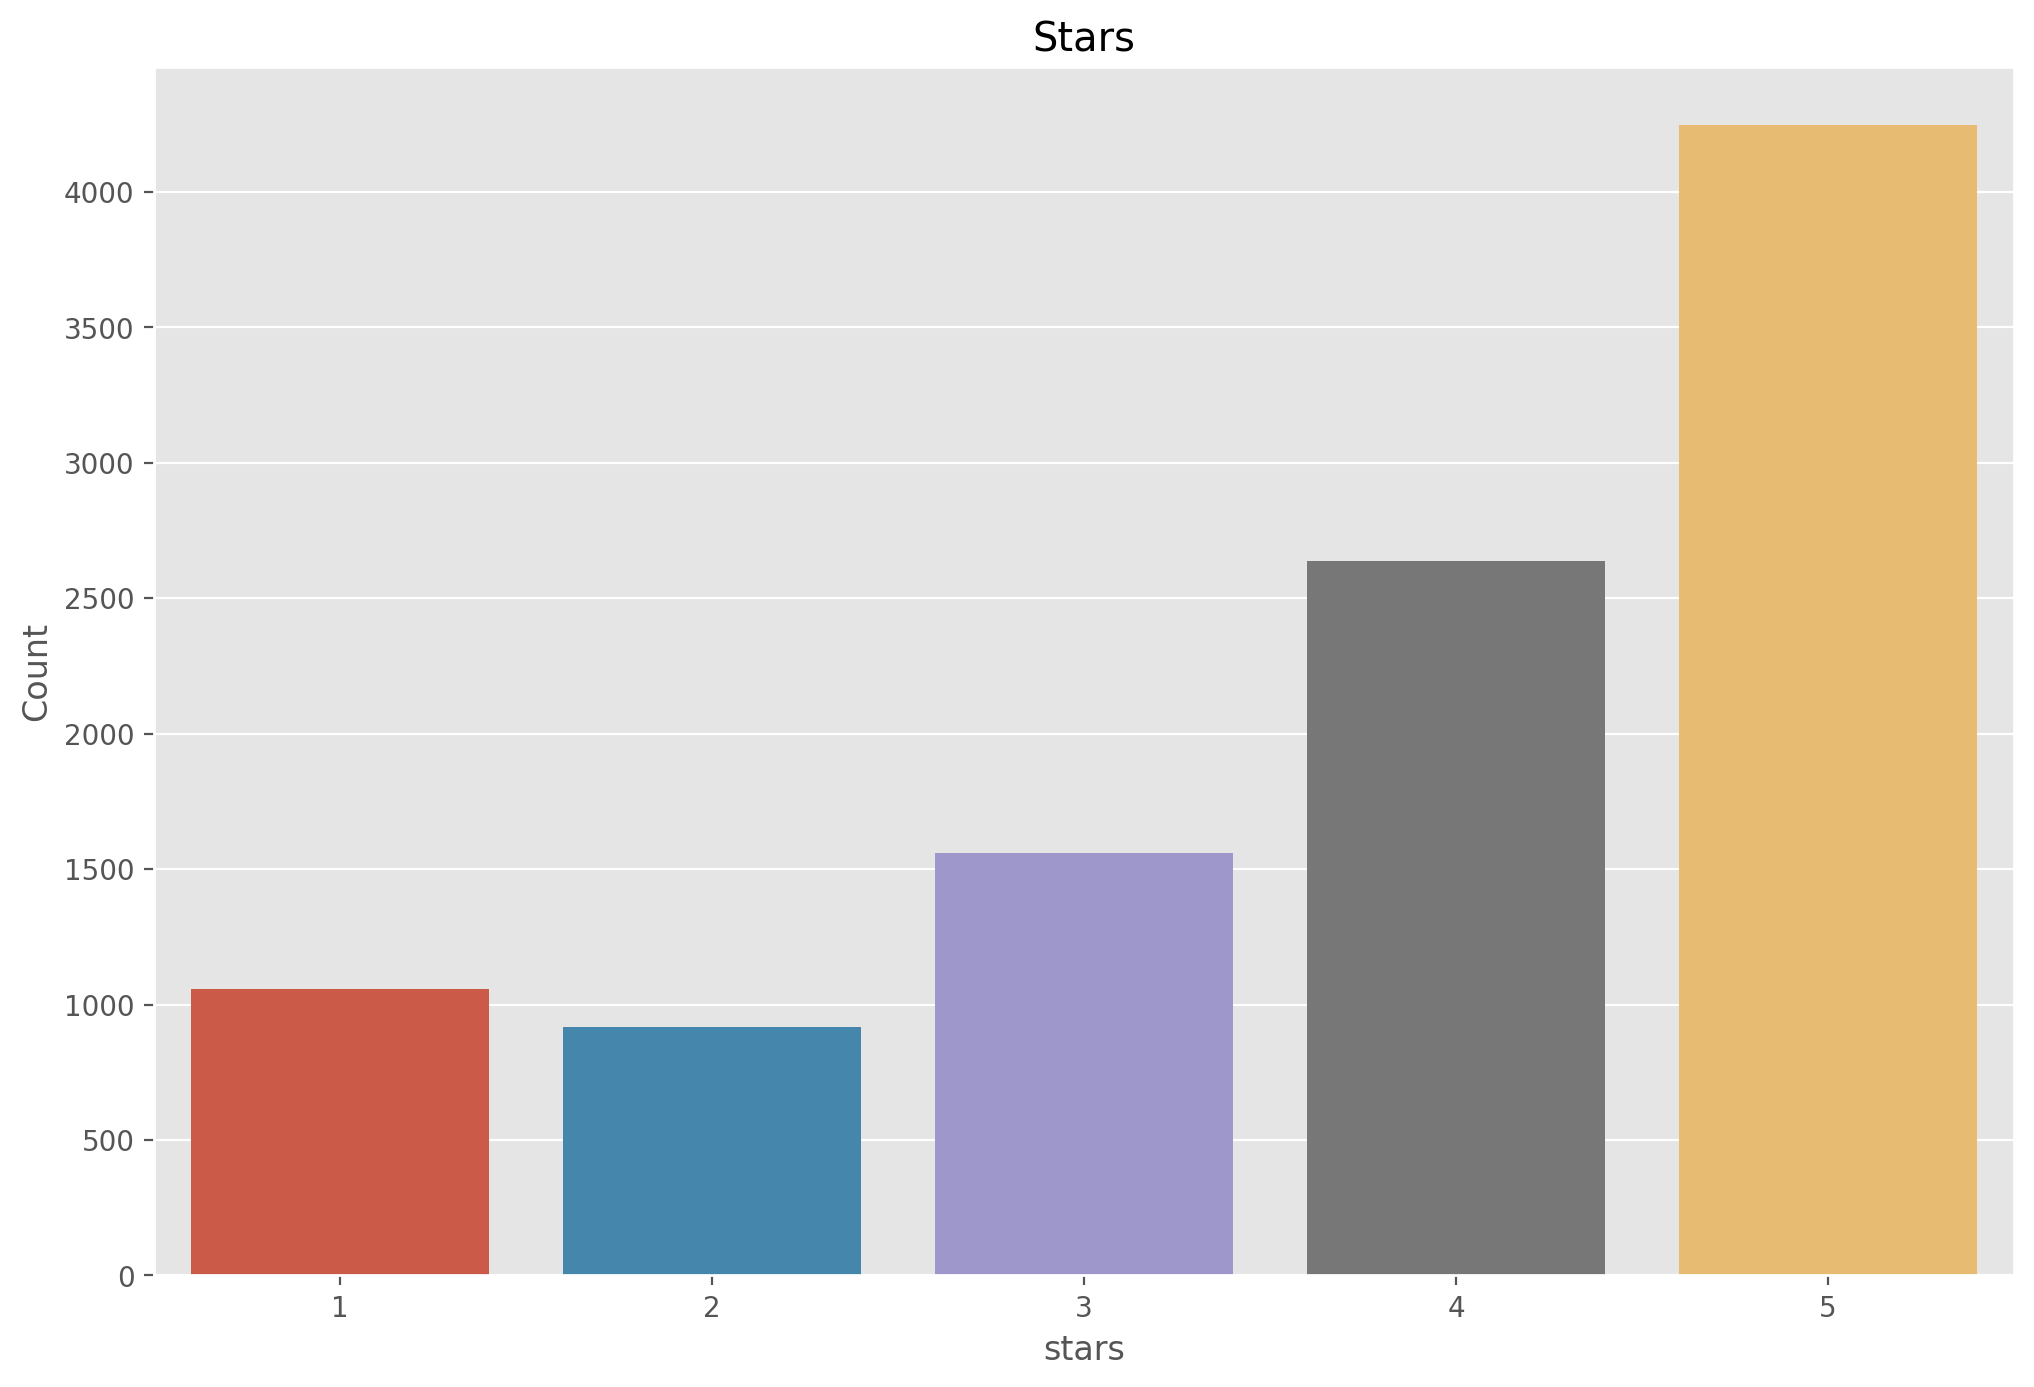

In [6]:
plt.style.use('ggplot')
fig = plt.figure(figsize=(12,8), dpi=200)
ax = plt.subplot(111)
ax = sns.countplot(x='stars', data=df)
ax.set_title('Stars')
ax.set_ylabel('Count');

In [7]:
df['year'] = pd.DatetimeIndex(df['date']).year
df2 = pd.DataFrame(df.groupby('year').stars.mean())

C:\Users\Ahmet\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


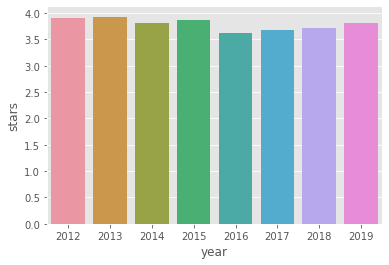

In [8]:
sns.barplot(df2.index, df2.stars);

# Steps to take in NLP
##### 1-All sentences will be converted to lowercase
##### 2-remove punctuation
##### 3-remove digits
##### 4- remove line break \n \r
###### -remove stop words, unnecessary words
###### -Tokenize
###### -lemma and stemma -remove attachments and find roots<
###### -with vectorizer we assign the texts to numbers

In [9]:
#1
df['text']=df['text'].str.lower()

In [10]:
#2
df['text']=df['text'].replace(['^\w\s',''])

In [11]:
#3
df['text']=df['text'].str.replace('\d+','')

C:\Users\Ahmet\AppData\Local\Temp\ipykernel_23488\2369217012.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['text']=df['text'].str.replace('\d+','')


In [12]:
#4
df['text']=df['text'].str.replace('\n ',' ').replace('\r','')

In [13]:
def sntmnt(a):
    if a < 3:
        return 'negative'
    elif a == 3:
        return 'neutral'
    else:
        return 'positive'

In [14]:
df['sentiment'] = df['stars'].map(sntmnt)

In [15]:
df.head()

,Unnamed: 0,review_id,user_id,business_id,stars,useful,funny,cool,text,date,year,sentiment
0,2370338,_WTGv5XnA-qb_XD1D7Z0jg,6PgdGb3HrZdsfl2GiULo8w,RESDUcs7fIiihp38-d6_6g,5,0,1,0,after getting food poisoning at the palms hote...,2012-12-04 03:10:18,2012,positive
1,2370357,JlNnsvMPLK_1-X2hwzK24w,IS9yw8P2uAPBX6FNLLX4KA,RESDUcs7fIiihp38-d6_6g,4,39,21,29,"""a feast worthy of gods""\n\nbaccarnal buffet i...",2014-01-17 00:50:50,2014,positive
2,2370373,hBkoWffORRb6aqKhC_Li2A,uZdFsE_aHbFBChgN6Xa8tw,RESDUcs7fIiihp38-d6_6g,4,1,1,1,the crab legs are better than the ones at wick...,2015-06-08 18:03:09,2015,positive
3,2370411,rbkxvrgZg5kdCL2a66QYmA,8ZWJNAEWsymXDzKx3B0tTQ,RESDUcs7fIiihp38-d6_6g,1,0,0,0,not worth it! too salty food and expensive! th...,2016-12-19 16:15:29,2016,negative
4,2370500,5tw_pedoHVi9bgeiBNsISg,E0sm4Ve7ifanFYeQMcV8Eg,RESDUcs7fIiihp38-d6_6g,5,0,0,0,i would give this infinite stars if i could. m...,2015-07-28 07:13:17,2015,positive


In [16]:
df['sentiment'].value_counts(normalize=True)

positive    0.660747
negative    0.189402
neutral     0.149851
Name: sentiment, dtype: float64

In [17]:
df['sentiment'].value_counts()


positive    6883
negative    1973
neutral     1561
Name: sentiment, dtype: int64

In [18]:
df=df[['text','stars','sentiment']]
df.head()

,text,stars,sentiment
0,after getting food poisoning at the palms hote...,5,positive
1,"""a feast worthy of gods""\n\nbaccarnal buffet i...",4,positive
2,the crab legs are better than the ones at wick...,4,positive
3,not worth it! too salty food and expensive! th...,1,negative
4,i would give this infinite stars if i could. m...,5,positive


In [19]:
df.sample()

,text,stars,sentiment
384,really great place! like oysters and desserts ...,5,positive


In [20]:
from nltk.corpus import stopwords

###### What: Remove common words that will likely appear in any text
###### Why: They don't tell you much about your text

In [21]:
df.text=df.text.replace(stopwords.words('english'),'')

C:\Users\Ahmet\AppData\Local\Temp\ipykernel_23488\3107367268.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.text=df.text.replace(stopwords.words('english'),'')


#### Translation and Language Detection Using Python

In [22]:
from langdetect import detect
df['language']=df['text'].apply(detect)


C:\Users\Ahmet\AppData\Local\Temp\ipykernel_23488\1654001489.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['language']=df['text'].apply(detect)


In [23]:
df.language.value_counts()

en       10375
es          10
zh-cn        7
ja           7
de           4
ko           4
fr           4
da           2
zh-tw        2
pt           1
sk           1
Name: language, dtype: int64

In [24]:
df=df[df['language']=='en']

In [25]:
df.language.value_counts()

en    10375
Name: language, dtype: int64

In [26]:
df.sample()

,text,stars,sentiment,language
8786,believed to be one of the best buffets in vega...,4,positive,en


In [27]:
from textblob import TextBlob
#ıt ıs a pytjhon library for textual data pprocessing . 
#It provides an interface for common natural language processing tasks
df[['polarity','subjectivity']]=df['text'].apply(lambda t:pd.Series(TextBlob(t).sentiment))
df

,text,stars,sentiment,language,polarity,subjectivity
0,after getting food poisoning at the palms hote...,5,positive,en,0.371429,0.605702
1,"""a feast worthy of gods""\n\nbaccarnal buffet i...",4,positive,en,0.219409,0.537292
2,the crab legs are better than the ones at wick...,4,positive,en,-0.134722,0.731944
3,not worth it! too salty food and expensive! th...,1,negative,en,-0.484375,0.400000
4,i would give this infinite stars if i could. m...,5,positive,en,0.362500,0.725000
...,...,...,...,...,...,...
10412,"best buffet ever! irma was great, served us be...",5,positive,en,0.526172,0.481250
10413,hollllllyyyy moleyyyy! \n\nthis buffet was one...,4,positive,en,0.231503,0.586869
10414,the selection is amazing and all the food is e...,5,positive,en,0.480000,0.630000
10415,one of the best buffets i've had in vegas. my ...,4,positive,en,0.185185,0.533333


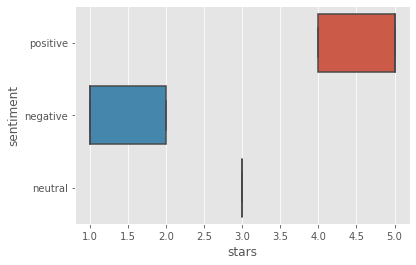

In [28]:
sns.boxplot(y='sentiment',x='stars',data=df);

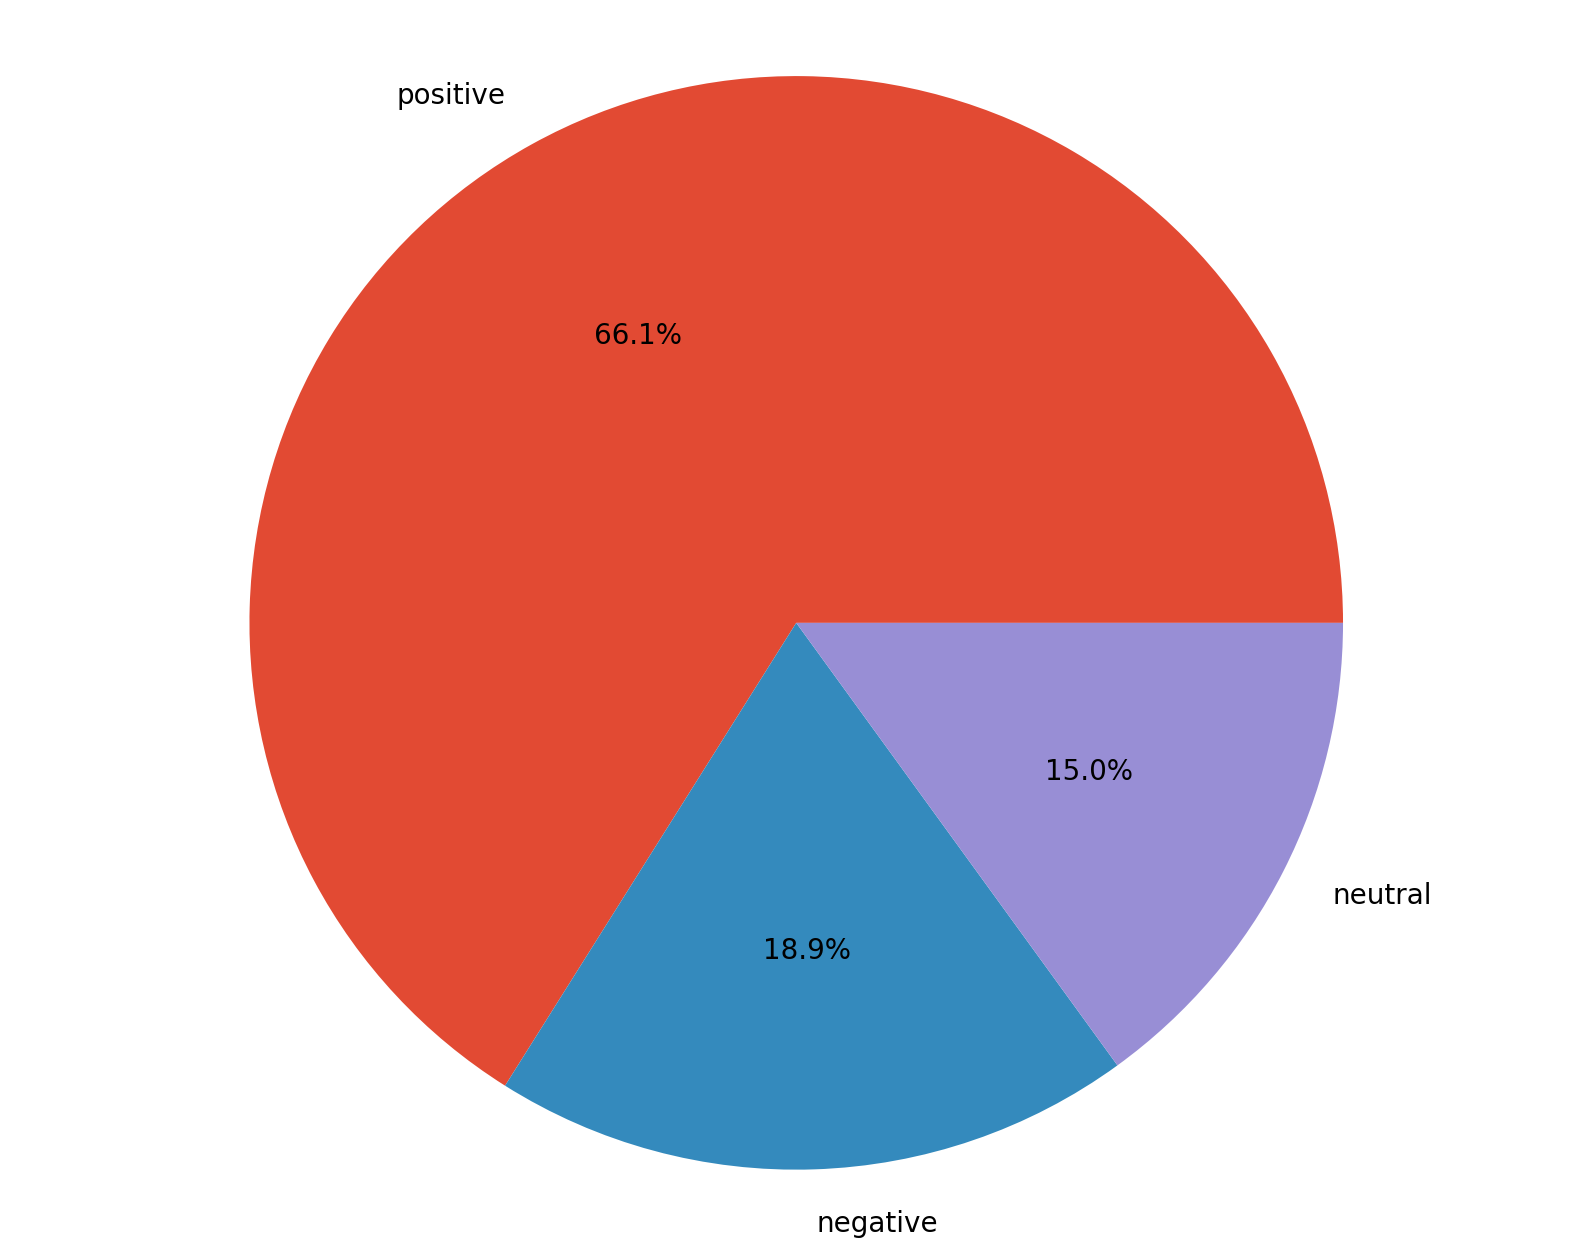

In [29]:
pie_sentiment = df.sentiment.value_counts(normalize=True)
plt.figure(figsize=(10,8), dpi=200)
labels=['positive', 'negative', 'neutral']
plt.pie(pie_sentiment, labels=labels, autopct='%1.1f%%')
plt.axis('equal');

# WORDCLOUD

In [30]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS

In [31]:
def create_wordcloud(text):
    mask = np.array(Image.open('cloud.png'))
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color="white",
                  mask=mask, max_words=25000,
                  stopwords= stopwords)
    wc.generate(str(text))
    wc.to_file('wc.png')
    print('Word Cloud saved successfully')
    display(Image.open('wc.png'))

Word Cloud saved successfully


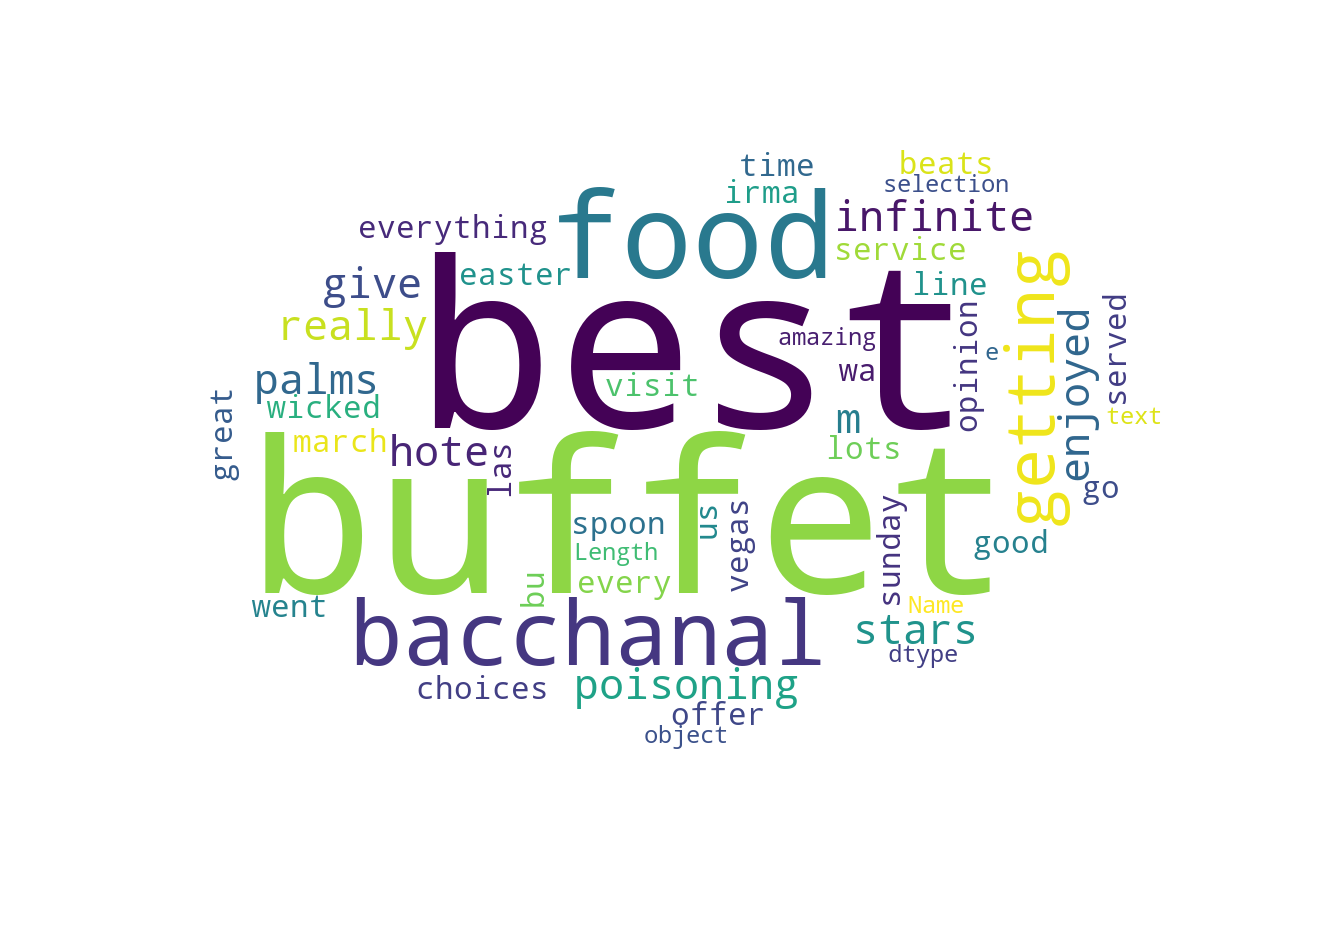

In [32]:
create_wordcloud(df[df['stars']==5].text)

Word Cloud saved successfully


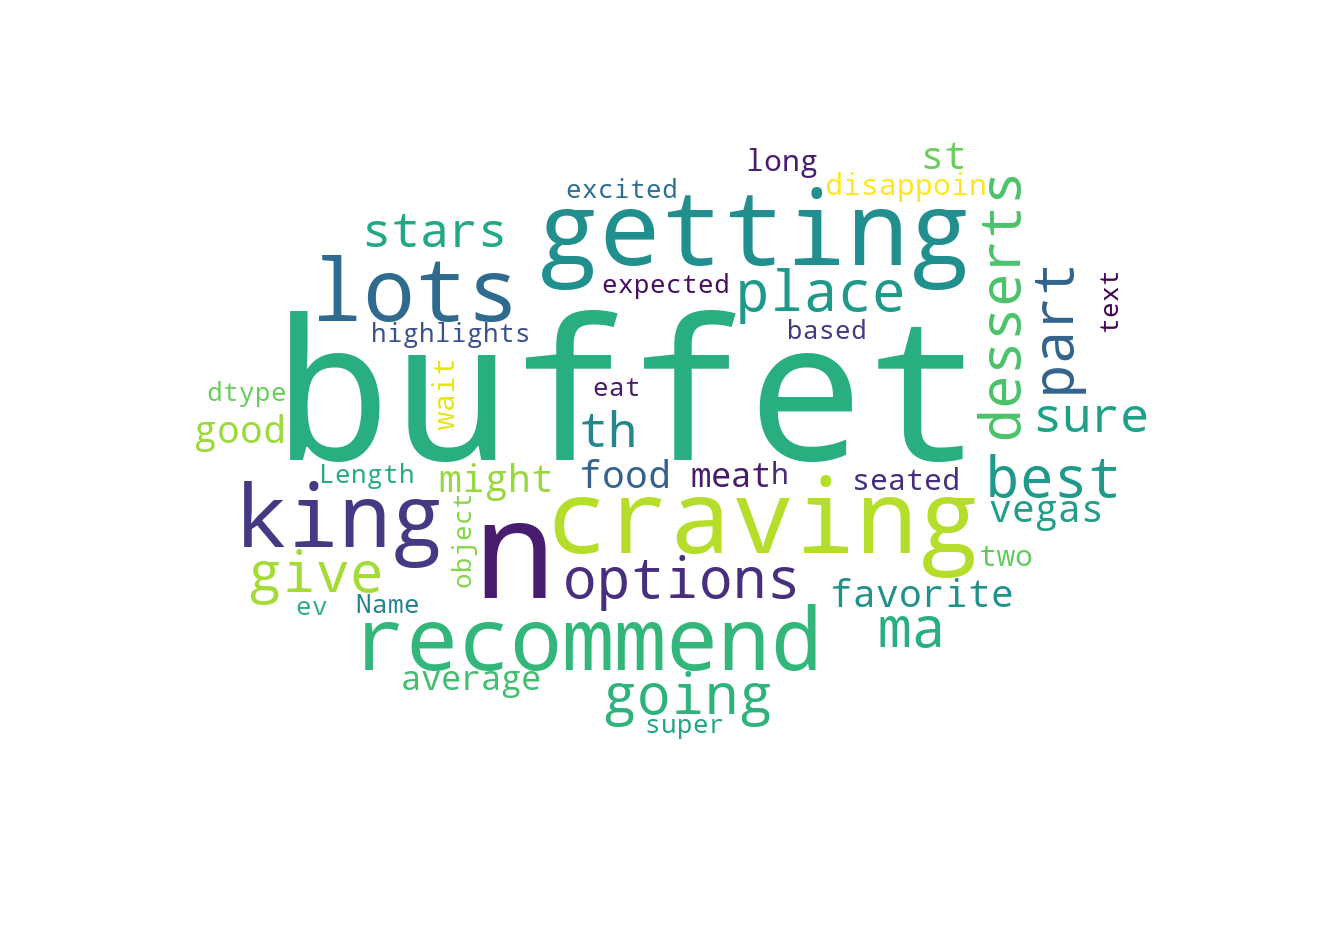

In [33]:
create_wordcloud(df[df['stars']==3].text)

Word Cloud saved successfully


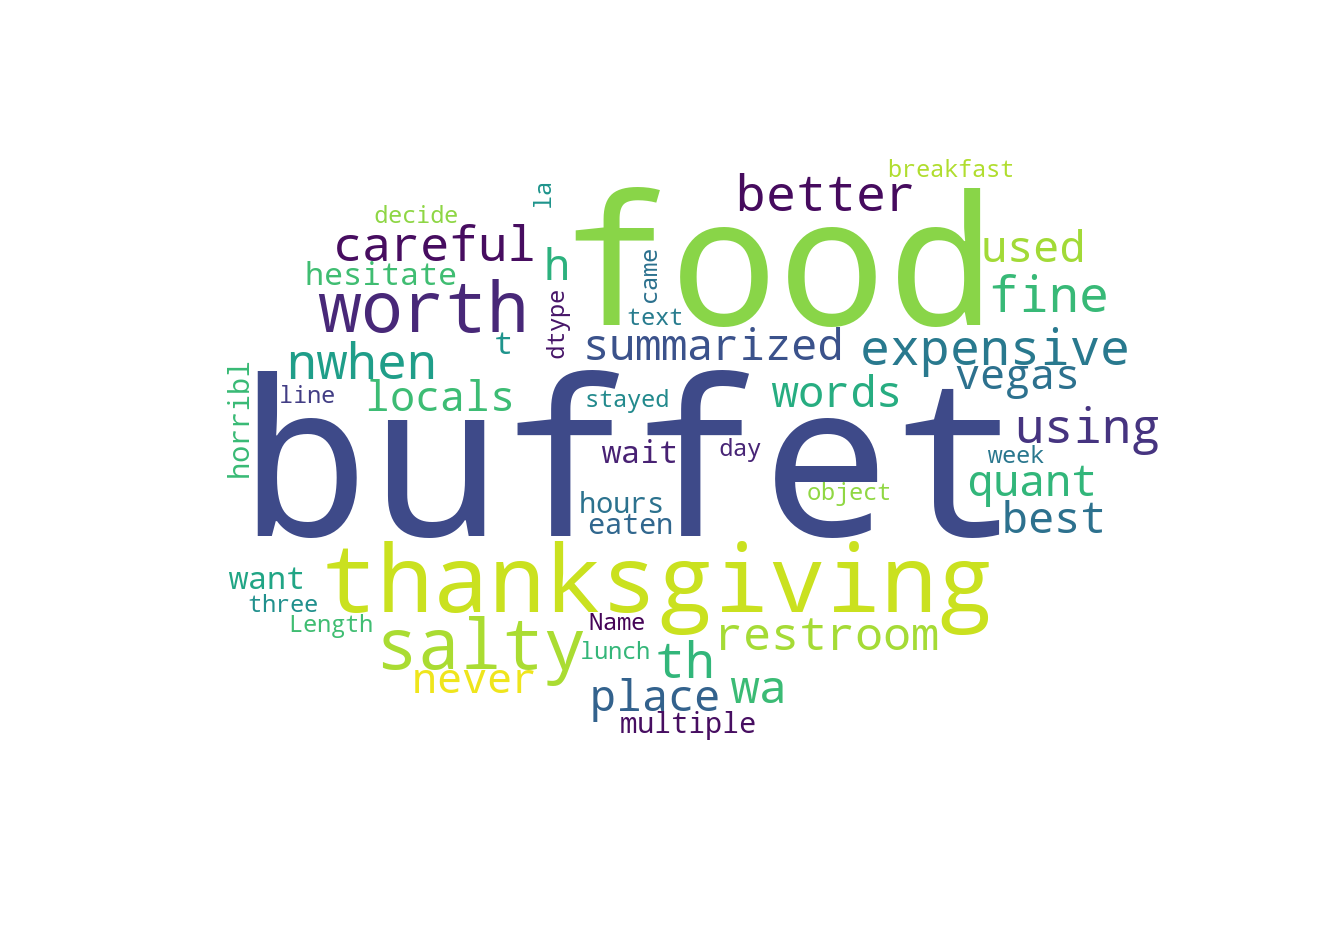

In [34]:
create_wordcloud(df[df['stars']==1].text)

In [35]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,precision_score,recall_score,f1_score


from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix,classification_report

In [36]:
X=df.text
y=df.sentiment

In [37]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=13)

In [38]:
vect=CountVectorizer(stop_words='english')
x_train_dtm=vect.fit_transform(x_train)
x_test_dtm=vect.transform(x_test)

In [39]:
tf=pd.DataFrame(x_train_dtm.toarray(), columns=vect.get_feature_names())
tf.head()

,___,____,_____,_________________________,__________________________,____________________________,_really_,_that_,aa,aaahhh,...,種類も豊富で,蒙古牛肉,蝦餃,要有排隊的準備,超难吃,还要至少拍一个小时队,这家的肉食很不错,食材不新鲜,食物的選擇蠻多的,魚香茄子
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
def tokenize_test(vect):
    x_train_dtm=vect.fit_transform(x_train)
    print('Features: ',x_train_dtm.shape[-1])
    x_test_dtm=vect.transform(x_test)
    M=MultinomialNB()
    LG=LogisticRegression()
    G=GradientBoostingClassifier()
    algo=[M,LG,G]
    algo_names=['MultinomialNB','LogisticReg','GradientBoosting']
    accu=[]
    for nb in algo:
        nb.fit(x_train_dtm,y_train)
        pred=nb.predict(x_test_dtm)
        accu.append(metrics.accuracy_score(y_test,pred))
    sozluk={'Accuracy':accu,'Models':algo_names}
    algos=pd.DataFrame(sozluk)
    return algos

In [41]:
vect=CountVectorizer(ngram_range=(1,1))
multi=tokenize_test(vect)

Features:  15619


C:\Users\Ahmet\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [42]:
multi

,Accuracy,Models
0,0.802441,MultinomialNB
1,0.802441,LogisticReg
2,0.766142,GradientBoosting


In [43]:
def words(data):
    words=[i.lower() for j in data for i in j.split()] 
    words=[i for i in words if len(i)>2] 
    return words

In [44]:
df[df['stars']==1]['text']

3        not worth it! too salty food and expensive! th...
12       food is fine, better than most buffets. \nwhen...
33       be careful using the restroom here. while i wa...
45       this buffet can be summarized in  words: quant...
50       this place used to be the best buffet i ever h...
                               ...                        
10367    we are locals in vegas and we never hesitate t...
10377    if you want to wait multiple hours for horribl...
10390    i  have eaten here for the breakfast and lunch...
10394    in thanksgiving day i stayed in line for three...
10410    came him from la! thanksgiving week. we decide...
Name: text, Length: 1051, dtype: object

In [45]:
worst=words(df[df['stars']==1]['text'])
worst

['not',
 'worth',
 'it!',
 'too',
 'salty',
 'food',
 'and',
 'expensive!',
 'this',
 'our',
 'furst',
 'and',
 'kast',
 'visit',
 'this',
 'buffet!',
 'food',
 'fine,',
 'better',
 'than',
 'most',
 'buffets.',
 'when',
 'read',
 'about',
 'the',
 'wait,',
 'doubted',
 'it,',
 'they',
 'were',
 'right!',
 'minutes',
 'minimum.',
 'food',
 "ain't",
 'that',
 'good!',
 'one',
 'line',
 'after',
 'another,',
 'for',
 'overpriced',
 'food.',
 "don't",
 'waste',
 'the',
 'cash',
 'buffet',
 'buffets',
 'pass,',
 'that',
 'many',
 'lines',
 'and',
 'cost',
 "isn't",
 'worth',
 'it!',
 'bacchanal',
 'slow,',
 'old',
 'hostess',
 'was',
 'rude.',
 'too',
 'pricey.',
 'careful',
 'using',
 'the',
 'restroom',
 'here.',
 'while',
 'was',
 'the',
 'floor',
 'drain',
 'overflowed',
 'with',
 'human',
 'excrement,',
 'all',
 'over',
 'feet',
 'and',
 'sandals.',
 'was',
 'offered',
 'towel',
 'wash',
 'feet',
 'the',
 'sink',
 'and',
 'asked',
 'fill',
 'out',
 'incident',
 'reports',
 'with',
 's

In [46]:
worst_freq=nltk.FreqDist(worst)
worst_freq=pd.DataFrame(worst_freq.most_common(10),columns=['Top_Words','Frequency'])

In [47]:
worst_freq

,Top_Words,Frequency
0,the,7659
1,and,4500
2,was,2991
3,for,1999
4,not,1433
5,that,1381
6,this,1315
7,they,1200
8,were,1179
9,food,1129


In [48]:
vect=CountVectorizer(ngram_range=(1,3),binary=True)
tf=pd.DataFrame(vect.fit_transform(df[df.stars==1].text).toarray(),columns=vect.get_feature_names())
features=vect.get_feature_names()
tf.shape

(1051, 177530)

In [49]:
tf 


,aback,aback by,aback by it,abandoned,abandoned chinatown,abandoned chinatown how,abandoned prime,abandoned prime ribs,abide,abide though,...,中国游客别去 chinese tourists,再也不来吃了,再也不来吃了 大家千万不要来吃,大家千万不要来吃,好难吃,好难吃 超难吃,好难吃 超难吃 东西不新鲜,超难吃,超难吃 东西不新鲜,超难吃 东西不新鲜 再也不来吃了
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1046,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1047,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1048,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1049,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
#vect= CountVectorizer(ngram_range=(8,10),binary=True)
#df=vect.fit_transform(df[df.stars==1].text).toarray().sum(axis=0)


In [52]:
mod_df=pd.DataFrame(df.reshape(1,396810 ),columns=vect.get_feature_names())
mod_df

,aback by it it never been an issue,aback by it it never been an issue for,aback by it it never been an issue for either,abandoned chinatown how can this be ceasar palace,abandoned chinatown how can this be ceasar palace refused,abandoned chinatown how can this be ceasar palace refused to,abandoned prime ribs tasted like they used cheapest,abandoned prime ribs tasted like they used cheapest quality,abandoned prime ribs tasted like they used cheapest quality beef,abide though is that for head the food,...,zone and try new place the bacchanal buffet which have,zone going bonkers not hard to please but,zone going bonkers not hard to please but this,zone going bonkers not hard to please but this was,zone stephanie then tells us that the offer,zone stephanie then tells us that the offer was,zone stephanie then tells us that the offer was for,中国游客别去 chinese tourists you deserve better service the,中国游客别去 chinese tourists you deserve better service the staff,中国游客别去 chinese tourists you deserve better service the staff named
0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [65]:
mod_df.max().sort_values(ascending=False)[0:10]

this is the best buffet in las vegas                      3
meats were overcooked and under seasoned the buffet       2
also commented that things sure have changed here in      2
ballys and that was horrible too what has happened to     2
horrible too what has happened to our buffets here in     2
horrible too what has happened to our buffets here        2
horrible too what has happened to our buffets             2
part of famous hotel in vegas otherwise they would not    2
part of famous hotel in vegas otherwise they would        2
eaten at the sterling buffet at ballys and                2
dtype: int64

# Suggestion
### improve meat quality,
### discount prices or make a campaign,
### change the chief
### staff should be courteous
### waiting in line : divide mealtimes into chunks

In [57]:
classifiers=[
    LogisticRegression(),
    KNeighborsClassifier(3),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    MultinomialNB(),
    BernoulliNB()
]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)
vec=CountVectorizer(stop_words='english')
X_train_vec=vec.fit_transform(X_train)
X_test_vec=vec.transform(X_test)

cvec_col=['Classifier','Methods','Accuracy','Precision','F1','Recall']
cvec=pd.DataFrame(columns=cvec_col)

for i in classifiers:
    pred=i.fit(X_train_vec,y_train).predict(X_test_vec)
    name = i.__class__.__name__
    
    accuracy=accuracy_score(y_test,pred)
    precision=precision_score(y_test,pred,average='weighted')
    f1=f1_score(y_test,pred,average='weighted')
    recall=recall_score(y_test,pred,average='weighted')

    cvec_entry=pd.DataFrame([[name,'CountVectorizer',accuracy*100,precision*100,f1*100,recall*100]],columns=cvec_col)
    cvec=cvec.append(cvec_entry)

cvec

C:\Users\Ahmet\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Ahmet\AppData\Local\Temp\ipykernel_23488\3245707634.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cvec=cvec.append(cvec_entry)
C:\Users\Ahmet\AppData\Local\Temp\ipykernel_23488\3245707634.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cvec=cvec.append(cvec_entry)
C:\U

,Classifier,Methods,Accuracy,Precision,F1,Recall
0,LogisticRegression,CountVectorizer,78.316736,77.034321,77.563721,78.316736
0,KNeighborsClassifier,CountVectorizer,66.077739,58.105615,59.309919,66.077739
0,DecisionTreeClassifier,CountVectorizer,65.210408,63.574379,64.309229,65.210408
0,RandomForestClassifier,CountVectorizer,71.345969,69.589176,63.336795,71.345969
0,AdaBoostClassifier,CountVectorizer,75.072278,71.459924,72.039435,75.072278
0,GradientBoostingClassifier,CountVectorizer,74.33344,71.343467,69.7967,74.33344
0,MultinomialNB,CountVectorizer,77.288789,73.859835,74.544153,77.288789
0,BernoulliNB,CountVectorizer,70.189528,68.175376,67.464329,70.189528


In [58]:
classifiers=[
    LogisticRegression(),
    KNeighborsClassifier(3),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    MultinomialNB(),
    BernoulliNB()
]

vec2=CountVectorizer(ngram_range=(1,2),stop_words='english',binary=True)
X_train_vec2=vec2.fit_transform(X_train)
X_test_vec2=vec2.transform(X_test)

cvec2_col=['Classifier','Methods','Accuracy','Precision','F1','Recall']
cvec2=pd.DataFrame(columns=cvec2_col)

for i in classifiers:
    pred2=i.fit(X_train_vec2,y_train).predict(X_test_vec2)
    name = i.__class__.__name__
    
    accuracy=accuracy_score(y_test,pred2)
    precision=precision_score(y_test,pred2,average='weighted')
    f1=f1_score(y_test,pred2,average='weighted')
    recall=recall_score(y_test,pred2,average='weighted')

    cvec2_entry=pd.DataFrame([[name,'N-grams',accuracy*100,precision*100,f1*100,recall*100]],columns=cvec2_col)
    cvec2=cvec2.append(cvec2_entry)

cvec2

C:\Users\Ahmet\AppData\Local\Temp\ipykernel_23488\81271817.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cvec2=cvec2.append(cvec2_entry)
C:\Users\Ahmet\AppData\Local\Temp\ipykernel_23488\81271817.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cvec2=cvec2.append(cvec2_entry)
C:\Users\Ahmet\AppData\Local\Temp\ipykernel_23488\81271817.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cvec2=cvec2.append(cvec2_entry)
C:\Users\Ahmet\AppData\Local\Temp\ipykernel_23488\81271817.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cvec2=cvec2.append(cvec2_entry)
C:\Users\Ahmet\AppData\Local\Temp\ipykernel_23488\81271817.py:29: Fu

,Classifier,Methods,Accuracy,Precision,F1,Recall
0,LogisticRegression,N-grams,79.665917,77.543013,78.096832,79.665917
0,KNeighborsClassifier,N-grams,64.246707,52.830071,53.355295,64.246707
0,DecisionTreeClassifier,N-grams,66.527465,63.961886,65.019667,66.527465
0,RandomForestClassifier,N-grams,67.619659,68.918554,57.179782,67.619659
0,AdaBoostClassifier,N-grams,74.558304,70.611955,71.326976,74.558304
0,GradientBoostingClassifier,N-grams,74.686797,72.131364,70.142399,74.686797
0,MultinomialNB,N-grams,68.58336,69.31305,58.865736,68.58336
0,BernoulliNB,N-grams,64.535818,58.504213,51.071056,64.535818


In [59]:
classifiers=[
    LogisticRegression(),
    KNeighborsClassifier(3),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    MultinomialNB(),
    BernoulliNB()
]
tf1=TfidfVectorizer(stop_words='english')
X_train_tf1=tf1.fit_transform(X_train)
X_test_tf1=tf1.transform(X_test)




tf1_col=['Classifier','Methods','Accuracy','Precision','F1','Recall']
tf1=pd.DataFrame(columns=tf1_col)

for i in classifiers:
    pred_tf1=i.fit(X_train_tf1,y_train).predict(X_test_tf1)
    name = i.__class__.__name__
    
    accuracy=accuracy_score(y_test,pred_tf1)
    precision=precision_score(y_test,pred_tf1,average='weighted')
    f1=f1_score(y_test,pred_tf1,average='weighted')
    recall=recall_score(y_test,pred_tf1,average='weighted')

    tf1_entry=pd.DataFrame([[name,'T-IDF',accuracy*100,precision*100,f1*100,recall*100]],columns=tf1_col)
    tf1=tf1.append(tf1_entry)

tf1

C:\Users\Ahmet\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Ahmet\AppData\Local\Temp\ipykernel_23488\3461852283.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tf1=tf1.append(tf1_entry)
C:\Users\Ahmet\AppData\Local\Temp\ipykernel_23488\3461852283.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tf1=tf1.append(tf1_entry)
C:\Users\A

,Classifier,Methods,Accuracy,Precision,F1,Recall
0,LogisticRegression,T-IDF,79.665917,77.018289,77.031579,79.665917
0,KNeighborsClassifier,T-IDF,69.450691,65.124609,66.253941,69.450691
0,DecisionTreeClassifier,T-IDF,65.338901,64.21403,64.740369,65.338901
0,RandomForestClassifier,T-IDF,70.928365,71.256293,62.790517,70.928365
0,AdaBoostClassifier,T-IDF,75.008031,71.977161,72.653786,75.008031
0,GradientBoostingClassifier,T-IDF,74.751044,72.380532,70.688558,74.751044
0,MultinomialNB,T-IDF,64.953421,61.711519,51.844169,64.953421
0,BernoulliNB,T-IDF,70.189528,68.175376,67.464329,70.189528


In [60]:
classifiers=[
    LogisticRegression(),
    KNeighborsClassifier(3),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    MultinomialNB(),
    BernoulliNB()
]
tf2=TfidfVectorizer(ngram_range=(1,2),stop_words='english',binary=True)
X_train_tf2=tf2.fit_transform(X_train)
X_test_tf2=tf2.transform(X_test)

tf2_col=['Classifier','Methods','Accuracy','Precision','F1','Recall']
tf2=pd.DataFrame(columns=tf2_col)

for i in classifiers:
    pred_tf2=i.fit(X_train_tf2,y_train).predict(X_test_tf2)
    name = i.__class__.__name__
    
    accuracy=accuracy_score(y_test,pred_tf2)
    precision=precision_score(y_test,pred_tf2,average='weighted')
    f1=f1_score(y_test,pred_tf2,average='weighted')
    recall=recall_score(y_test,pred_tf2,average='weighted')

    tf2_entry=pd.DataFrame([[name,'T-IDF/N-gram',accuracy*100,precision*100,f1*100,recall*100]],columns=tf2_col)
    tf2=tf2.append(tf2_entry)

tf2

C:\Users\Ahmet\AppData\Local\Temp\ipykernel_23488\640892163.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tf2=tf2.append(tf2_entry)
C:\Users\Ahmet\AppData\Local\Temp\ipykernel_23488\640892163.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tf2=tf2.append(tf2_entry)
C:\Users\Ahmet\AppData\Local\Temp\ipykernel_23488\640892163.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tf2=tf2.append(tf2_entry)
C:\Users\Ahmet\AppData\Local\Temp\ipykernel_23488\640892163.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tf2=tf2.append(tf2_entry)
C:\Users\Ahmet\AppData\Local\Temp\ipykernel_23488\640892163.py:28: FutureWarning: The fr

,Classifier,Methods,Accuracy,Precision,F1,Recall
0,LogisticRegression,T-IDF/N-gram,77.513652,75.563816,72.935326,77.513652
0,KNeighborsClassifier,T-IDF/N-gram,71.538709,66.185668,67.123633,71.538709
0,DecisionTreeClassifier,T-IDF/N-gram,65.724382,64.55794,65.097489,65.724382
0,RandomForestClassifier,T-IDF/N-gram,68.037263,61.275653,57.885065,68.037263
0,AdaBoostClassifier,T-IDF/N-gram,73.980084,70.742742,71.577949,73.980084
0,GradientBoostingClassifier,T-IDF/N-gram,75.586251,73.235132,72.158015,75.586251
0,MultinomialNB,T-IDF/N-gram,64.246707,41.276394,50.261457,64.246707
0,BernoulliNB,T-IDF/N-gram,64.535818,58.504213,51.071056,64.535818


In [62]:
result=pd.concat([cvec,cvec2,tf1,tf2],axis=0)
result

,Classifier,Methods,Accuracy,Precision,F1,Recall
0,LogisticRegression,CountVectorizer,78.316736,77.034321,77.563721,78.316736
0,KNeighborsClassifier,CountVectorizer,66.077739,58.105615,59.309919,66.077739
0,DecisionTreeClassifier,CountVectorizer,65.210408,63.574379,64.309229,65.210408
0,RandomForestClassifier,CountVectorizer,71.345969,69.589176,63.336795,71.345969
0,AdaBoostClassifier,CountVectorizer,75.072278,71.459924,72.039435,75.072278
0,GradientBoostingClassifier,CountVectorizer,74.33344,71.343467,69.7967,74.33344
0,MultinomialNB,CountVectorizer,77.288789,73.859835,74.544153,77.288789
0,BernoulliNB,CountVectorizer,70.189528,68.175376,67.464329,70.189528
0,LogisticRegression,N-grams,79.665917,77.543013,78.096832,79.665917
0,KNeighborsClassifier,N-grams,64.246707,52.830071,53.355295,64.246707
